<img src="logo.png" width=200, height=200>

<h1><center>Inference: Socio-economic wellness of South Africa</center></h1>

In [382]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

## Introduction

The earnings gap between men and women is often referenced and has received a lot of attention in the media (https://www.thesouthafrican.com/news/gender-pay-gap-south-africa-charts/ ). However, while gender may be related to the monthly earnings of people in South Africa, it is also possible that other variables are contributing to this gap in earnings. In this project, I investigate some factors that may be related to the monthly earnings of the people of South Africa, in addition to gender. 

### Research question

Aside from gender, are there other factors that affect the monthly earnings of a person in South Africa?

### Hypothesis
In addition to gender, there is also a relationship between a person's education, work and location and their monthly earnings in South Africa.

In order to test this hypothesis, data has been obtained from the Labour Market Dynamics surveys published by Stats SA. Variables of interest have been extracted and have been used to fit regression models to establish whether the variable are significantly related to the monthly earnings. In the following section, the data used in this project is described.

### Methodology
A brief overview of the methodology is as follows:<br/>
1. Read in data <br/>
2. Encode variables <br/>
3. Exploratory plots <br/>
4. Initial modelling <br/>
5. Feature selection using step-wise regression <br/>
6. Bootstrapping for feature selection and testing<br/>
7. Comparison of regression coefficient over the years <br/>

More in-depth explanation of the steps in the methodology will be provided in the relevant sections.

## 1. Read in data

### Labour Market Dynamics - Unemployment
The Quarterly Labour Force Survey (QLFS) is a household-based sample survey conducted by Statistics South Africa (Stats SA). It collects data on the labour market activities of individuals aged 15 years or older who live in South Africa. Since 2008, Stats SA have generated an annual report which is released under the name "Labour Market Dynamics in South Africa". This report is constructed using data from a version of the pooled data from all four quarters (all four QLFS datasets in the year) and is ascribed the same nomenclature. 

In this section, the Labour Market Dynamics surveys for the years 2013-2017 is explored. Each survey is read in seperately and then concatenated to provide time series data. Only records with a valid value for monthly earnings are considered.

There are various variables of interest in this study. In this section the variables of interest will be briefly described:
<br/>
Personal: Gender, Age, Marital status<br/>
Education: Education status, Study field<br/>
Location: Province, Geotype<br/>
Work: Occupation, Industry, Multiple jobs, Hours worked, Sector<br/>

##### Province
The province where the respondent resides. The values are as follows:

1 - Western Cape<br/>
2 - Eastern Cape<br/>
3 - Northern Cape<br/>
4 - Free State<br/>
5 - KwaZulu-Natal<br/>
6 - North West<br/>
7 - Gauteng<br/>
8 - Mpumalanga<br/>
9 - Limpopo<br/>

##### Gender
The gender of the respondent

1 - Male<br/>
2 - Female<br/>

##### Age
The age of the respondent

##### Marital Status
The marital status of the respondent. The values are as follows:

1 - Married<br/>
2 - Living together like husband and wife<br/>
3 - Widow/Widower<br/>
4 - Divorced or seperated<br/>
5 - Never married<br/>

##### Study field
This variable applies to respondets that have obtained a post-school qualification. This indicates the field in which the post-school qualification was obtained.

1 - Agriculture or Renewable natural resources<br/>
2 - Architecture or environmental design<br/>
3 - Arts; Visual or Performing<br/>
4 - Business; commerce and management studies<br/>
5 - Communication<br/>
6 - Computer science<br/>
7 - Education; training or development<br/>
8 - Engineering or engineering technology<br/>
9 - Health care or health sciences<br/>
10 - Home economics<br/>
11 - Industrial arts; traders or technology<br/>
12 - Languages; linguistic or literature<br/>
13 - Law<br/>
14 - Libraries or museums<br/>
15 - Life sciences or physical sciences<br/>
16 - Mathematical sciences<br/>
17 - Military sciences<br/>
18 - Philosophy; religion or theology<br/>
19 - Physical education or leisure<br/>
20 - Psychology<br/>
21 - Public administration or social services<br/>
22 - Social sciences or social studies<br/>
23 - Other<br/>
24 - Management<br/>
25 - Marketing<br/>
26 - Information technology and computer science<br/>
27 - Finance; economics and accounting<br/>
28 - Office administration<br/>
29 - Electrical infrastructure construction<br/>
30 - Civil engineering and building construction<br/>
31 - Engineering<br/>
32 - Primary agriculture<br/>
33 - Hospitality<br/>
34 - Tourism<br/>
35 - Safety in society<br/>
36 - Mechatronics<br/>
37 - Education and development<br/>

##### Multiple jobs
Indicates whether the respondent has multiple jobs.

1 - Yes<br/>
2 - No<br/>

##### Occupation
Indicates the occupation of the respondent.

1 - Legislators; senior officials and managers<br/> 
2 - Professionals<br/> 
3 - Technical and associate professionals<br/> 
4 - Clerks<br/> 
5 - Service workers and shop and market sales workers<br/> 
6 - Skilled agricultural and fishery workers<br/> 
7 - Craft and related trades workers<br/> 
8 - Plant and machine operators and assemblers<br/> 
9 - Elementary Occupation<br/> 
10 - Domestic workers<br/> 
11 - Other occupation<br/> 

##### Industry
Indicates the industry in which the respondent works

1 - Agriculture; hunting; forestry and fishing<br/>
2 - Mining and quarrying<br/>
3 - Manufacturing<br/>
4 - Electricity; gas and water supply<br/>
5 - Construction<br/>
6 - Wholesale and retail trade<br/>
7 - Transport; storage and communication<br/>
8 - Financial intermediation; insurance; real estate and business services<br/>
9 - Community; social and personal services<br/>
10 - Private households<br/>
11 - Other<br/>

##### Hours worked
Indicates how many hours the respondent usually works every week

##### Salary
Indicates the total earnings the respondent earns every month

##### Geo Type
The type of geography of the area in which the respondent lives

1 - Urban formal<br/>
2 - Urban informal<br/>
4 - Tribal areas<br/>
5 - Rural formal<br/>

##### Sector
The sector in which the respondent works

1 - Formal sector (non-agricultural)<br/>
2 - Informal sector (non-agricultural)<br/>
3 - Agriculture<br/>
4 - Private households<br/>

##### Education status
The variable indicates the level of education obtained by the respondent.

1 - No schooling<br/>
2 - Less than primary completed<br/>
3 - Primary completed<br/>
4 - Secondary not completed<br/>
5 - Secondary completed<br/>
6 - Tertiary<br/>
7 - Other<br/>

In [705]:
# The column names that will be used for the dataset
labels=['Province','Gender','Age','Marital_status','Study_field','Multiple_jobs','Occupation','Industry',\
       'Hours_worked','Salary','Geotype','Sector','Edu_status']
labels_all=labels

In [706]:
L2013=pd.read_csv("Labour/qlfs!annual!2013!final_F1.csv")
L2013=L2013[L2013['Q54a_monthly'].isna()==False] # remove records that do not have valid earnings values
L2013=L2013[['Province','Q13GENDER','Q14AGE','Q16MARITALSTATUS','Q18FIELD',\
            'Q41MULTIPLEJOBS','occup','indus','Q418HRSWRK','Q54a_monthly','Geo_type','sector1','Education_Status']]
L2013.columns=labels
L2013=L2013.fillna(88888888) # fill missing values with a dummy value
objects=L2013.select_dtypes(include=['float64']).columns
L2013[objects]=L2013[objects].astype('int64') # convert all numerical values to integers
L2013_filtered=L2013[L2013['Salary']<88888888] # remove records that do not have valid earnings values
L2013_filtered.loc[:,'Year']=2013 # add year variable to identify data from different years

In [707]:
L2014=pd.read_csv("Labour/LMD!2014_F1.csv")
L2014=L2014[L2014['Q54A_MONTHLY'].isna()==False] # remove records that do not have valid earnings values
L2014=L2014[['PROVINCE','Q13GENDER','Q14AGE','Q16MARITALSTATUS','Q18FIELD',\
            'Q41MULTIPLEJOBS','OCCUP','INDUS','HRSWRK','Q54A_MONTHLY','GEO_TYPE','SECTOR1','EDUCATION_STATUS']]
L2014.columns=labels
L2014=L2014.fillna(88888888) # fill missing values with a dummy value
objects=L2014.select_dtypes(include=['float64']).columns
L2014[objects]=L2014[objects].astype('int64') # convert all numerical values to integers
L2014_filtered=L2014[L2014['Salary']<88888888] # remove records that do not have valid earnings values
L2014_filtered.loc[:,'Year']=2014 # add year variable to identify data from different years

In [708]:
pd.set_option('mode.chained_assignment', None)
L2015=pd.read_csv("Labour/LMDSA 2015 v1.0 CSV.csv")
L2015=L2015[L2015['Q54a_monthly'].isna()==False] # remove records that do not have valid earnings values
L2015=L2015[['Province','Q13GENDER','Q14AGE','Q16MARITALSTATUS','Q18FIELD',\
            'Q41MULTIPLEJOBS','occup','indus','Hrswrk','Q54a_monthly','Geo_type','sector1','Education_Status']]
L2015.columns=labels
L2015=L2015.fillna(88888888) # fill missing values with a dummy value
objects=L2015.select_dtypes(include=['object']).columns
L2015=L2015.replace('1.79769313486232e+308',88888888)
L2015[objects]=L2015[objects].astype('int64') # convert all numerical values to integers
L2015_filtered=L2015[L2015['Salary']<88888888] # remove records that do not have valid earnings values
L2015_filtered.loc[:,'Year']=2015 # add year variable to identify data from different years

In [709]:
L2016=pd.read_csv("Labour/LMD!2016_F1.csv")
L2016=L2016[L2016['Q54a_monthly'].isna()==False] # remove records that do not have valid earnings values
L2016=L2016[['Province','Q13GENDER','Q14AGE','Q16MARITALSTATUS','Q18FIELD',\
            'Q41MULTIPLEJOBS','occup','indus','Hrswrk','Q54a_monthly','Geo_type','sector1','Education_Status']]
L2016.columns=labels
L2016=L2016.fillna(88888888) # fill missing values with a dummy value
objects=L2016.select_dtypes(include=['float64']).columns # convert all numerical values to integers
L2016[objects]=L2016[objects].astype('int64')
L2016_filtered=L2016[L2016['Salary']<88888888] # remove records that do not have valid earnings values
L2016_filtered.loc[:,'Year']=2016 # add year variable to identify data from different years

In [710]:
L2017=pd.read_csv("Labour/LMD!2017_F1.csv")
L2017=L2017[L2017['Q54a_monthly'].isna()==False] # remove records that do not have valid earnings values
L2017=L2017[['Province','Q13GENDER','Q14AGE','Q16MARITALSTATUS','Q18FIELD',\
            'Q41MULTIPLEJOBS','occup','indus','Q418HRSWRK','Q54a_monthly','Geo_type_code','sector1','Education_Status']]
L2017.columns=labels
L2017=L2017.fillna(88888888) # fill missing values with a dummy value
objects=L2017.select_dtypes(include=['float64']).columns
L2017[objects]=L2017[objects].astype('int64') # convert all numerical values to integers
L2017_filtered=L2017[L2017['Salary']<88888888] # remove records that do not have valid earnings values
L2017_filtered.loc[:,'Year']=2017 # add year variable to identify data from different years

In [22]:
# concatenate all the data frames from the different years into one data frame
L_All=pd.concat([L2013_filtered,L2014_filtered,L2015_filtered,L2016_filtered,L2017_filtered],join='inner',ignore_index=True)

In [734]:
print('Number of records per year:')
print('2013: {:}'.format(L2013_filtered.shape[0]))
print('2014: {:}'.format(L2014_filtered.shape[0]))
print('2015: {:}'.format(L2015_filtered.shape[0]))
print('2016: {:}'.format(L2016_filtered.shape[0]))
print('2017: {:}'.format(L2017_filtered.shape[0]))

Number of records per year:
2013: 66620
2014: 65058
2015: 57494
2016: 51338
2017: 51223


## 2. Encode variables

Due to the fact that most of the variables being considered in this project are categorical variables. The values of the categorical variables are numeric however the numbers have no real meaning beyond labelling the different categories. Therefore, the categorical variables need to be transformed into indicator variables using one-hot encoding.

In [712]:
# remove non-categorical variables from the list that will be encoded
labels.remove('Age')
labels.remove('Salary')
labels.remove('Hours_worked')

In [360]:
L2017_dummies = pd.get_dummies(L2017_filtered, columns = labels, drop_first = False)
L2017_dummies=L2017_dummies.drop(['Study_field_88888888'],axis=1)

In [104]:
L2016_dummies = pd.get_dummies(L2017_filtered, columns = labels, drop_first = False)
L2016_dummies=L2016_dummies.drop(['Study_field_88888888'],axis=1)

In [456]:
L2015_dummies = pd.get_dummies(L2015_filtered, columns = labels, drop_first = False)
L2015_dummies=L2015_dummies.drop(['Study_field_88888888'],axis=1)

In [457]:
L2014_dummies = pd.get_dummies(L2014_filtered, columns = labels, drop_first = False)
L2014_dummies=L2014_dummies.drop(['Study_field_88888888'],axis=1)

In [458]:
L2013_dummies = pd.get_dummies(L2013_filtered, columns = labels, drop_first = False)
L2013_dummies=L2013_dummies.drop(['Study_field_88888888'],axis=1)

In [716]:
LAll_dummies = pd.get_dummies(L_All, columns = labels, drop_first = False)
LAll_dummies=LAll_dummies.drop(['Study_field_88888888','Geotype_88888888'],axis=1)

## 3. Exploratory plots

Firstly, to explore the relationship between gender and monthly earnings, the mean earnings for the different genders from the year 2013-2017 is plotted. As can be seen in the plot, the monthly earnings of women is consistently less than the monthly earnings for mean over this time period. This is in line with the findings of external sources (https://www.thesouthafrican.com/news/gender-pay-gap-south-africa-charts/  ). A violin plot for the different genders in the different years is also provided to investigate the distribution of the monthly earnings for the different genders

Text(0,0.5,'Mean earnings')

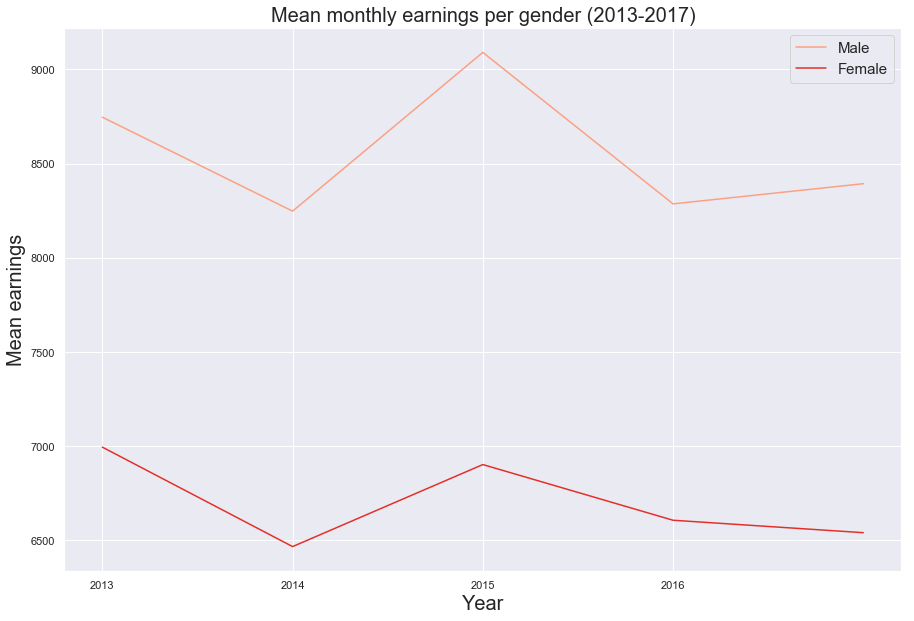

In [23]:
sns.set()
sns.set_palette("Reds", n_colors=2)
fig, ax = plt.subplots(figsize=(15,10))
L_All.groupby(["Year","Gender"]).mean()['Salary'].unstack().plot(ax=ax) # group data by year and gender
# rename labels in legend to names rather than integers
plt.legend(['Male','Female'],fancybox=True,fontsize=15)
plt.title('Mean monthly earnings per gender (2013-2017)',fontsize=20)
plt.xticks(np.arange(2013, 2017, 1))  
plt.xlabel('Year',fontsize=20)
plt.ylabel('Mean earnings',fontsize=20)

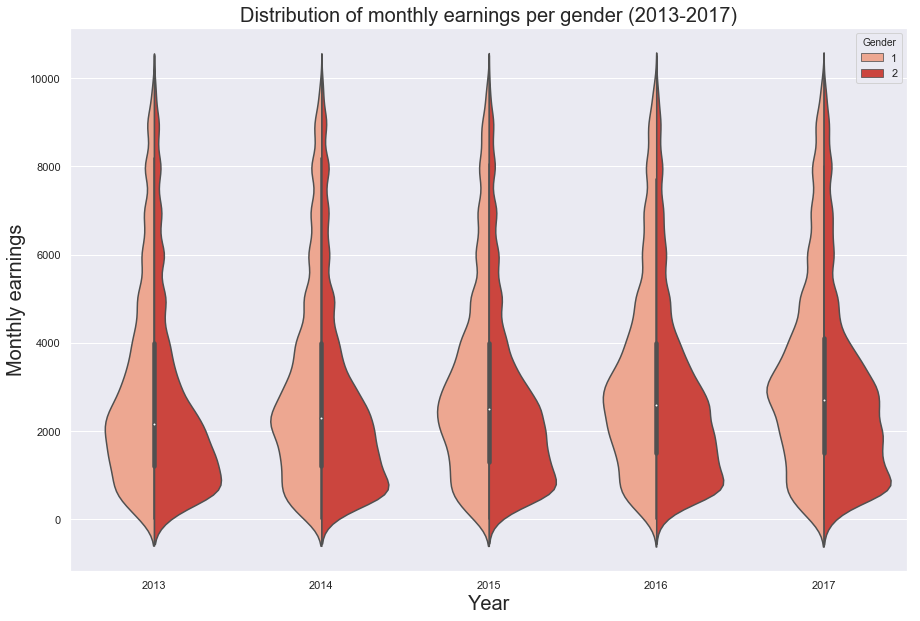

In [56]:
L_mod_2 = L_All.loc[L_All.Salary < 10000]
sns.set()
sns.set_palette("Reds", n_colors=2)
fig, ax = plt.subplots(figsize=(15,10))
sns.catplot(x='Year', y='Salary', kind="violin",split=True, data=L_mod_2, hue='Gender',ax=ax)
plt.close()
plt.title('Distribution of monthly earnings per gender (2013-2017)',fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.ylabel('Monthly earnings',fontsize=20)
# plt.legend(['Male','Female'],fancybox=True,fontsize=15)
plt.show()

The violin plot shows the distribution of monthly earnings around the mean for the different genders in the different years. It is shown that for all the years, the distributions for both genders remain similar as the the monthly earnings is negatively skewed, with most of the observations occuring on the lower end of the scale. The mode is less than the mean for both genders, leading to the skewed distribution. However, the monthly salary for women is more highly negatively skewed, which is also indicated by the lower mean monthly earnings shown for women. Therefore, there are more women that have monthly earnings that reported at the lower end of the scale than men, leading to a lower mean monthly salary. However, included in the scope of this project is to investigate other factors that may also be related to the monthly earnings.

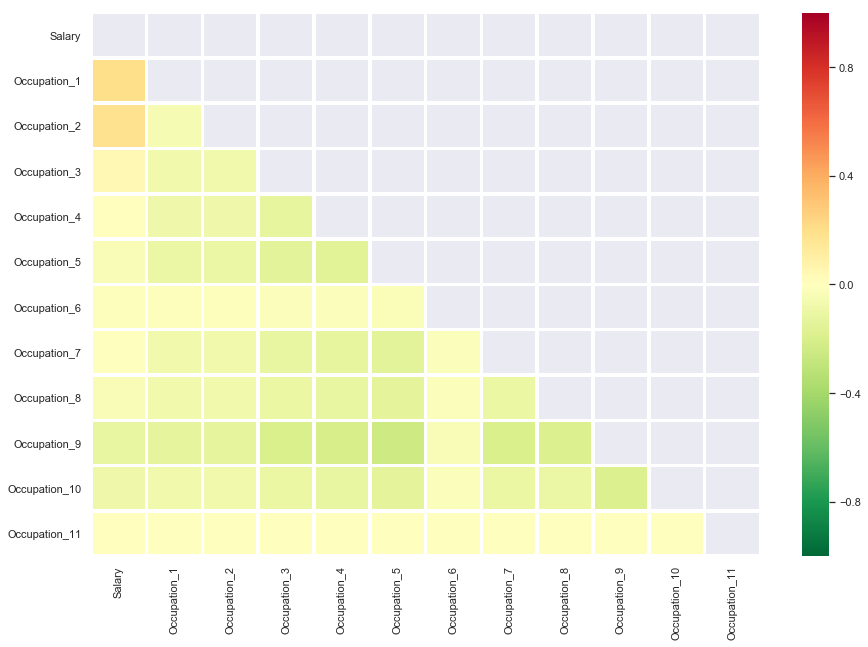

In [726]:
# plot correlation matrix between monthly earnings and different categories of occupations
fig, ax = plt.subplots(figsize=(15,10))
corr_df=LAll_dummies[['Salary','Occupation_1','Occupation_2','Occupation_3','Occupation_4',\
                     'Occupation_5','Occupation_6','Occupation_7','Occupation_8','Occupation_9',\
                     'Occupation_10','Occupation_11']].corr(method='pearson')
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

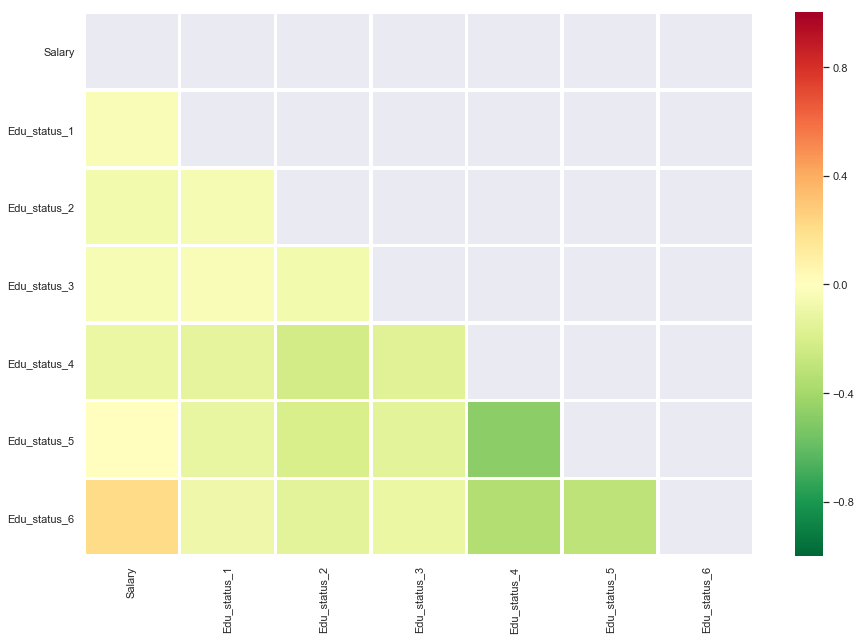

In [727]:
# plot correlation matrix between monthly earnings and different categories of education status
fig, ax = plt.subplots(figsize=(15,10))
corr_df=LAll_dummies[['Salary','Edu_status_1','Edu_status_2','Edu_status_3','Edu_status_4',\
                     'Edu_status_5','Edu_status_6']].corr(method='pearson')
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_df,cmap='RdYlGn_r',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The correlation plots indicate that there is also relationships between monthly earnings and education status as well as monthly earnings and occupation. There appears to be a positive correlation between monthly earnings and Edu_status_6 (Tertiary education) as well as between Occupation_2 (Professional) and monthly earnings. However, the relationship between monthly earnings and the various variables of interest cannot only be considered in isolation, as the interations between indicator variables may also affect the relationship. Therefore correlation of individual features with the response variable is not enough. In the following section, the features will be used to fit a OLS model to investigate the relationships between the features and the response variable.

## 4. Initial modelling

In this section, the data is fit to OLS regression models to do some preliminary investigation into the features that relate to monthly earnings. Firstly, the relationship between monthly earnings and gender needs to be investigated. To do this, the gender data alone is used to fit a OLS regression model for monthly earnings. Since there is collinearity between the two encoded gender variables, the condition number is very high, so it is not a good model. However, the coefficients show that Gender_1 contributes more to higher earnings rather than Gender_2 which is also shown by the mean monthly earnings of men and women.

In [114]:
formula = "Salary ~ Gender_1 + Gender_2"
gender2017_model = smf.ols(formula, L2017_dummies).fit(fit_intercept=False)
print(gender2017_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.21e-35
Time:                        23:38:20   Log-Likelihood:            -5.7103e+05
No. Observations:               51223   AIC:                         1.142e+06
Df Residuals:                   51221   BIC:                         1.142e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4978.0684     49.514    100.539      0.0

Now it is necessary to look at a model fit using all the variables included in the dataset. While the R-squared and R-squared adjusted values for this model is much higher, there are still many issues. The condition number is very high which indicates a problem with multicollinearity. The confidence intervals for many of the variables are very wide and many include 0, which indicates that the quality of the model is bad. The AIC score is also high since so many variables are used. Therefore, significant features need to be selected and the model refit before any conclusions can be made.

In [288]:
L2017_without_response=L2017_dummies.drop(['Salary','Year'],axis=1)
response='Salary'
formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(L2017_without_response.columns))
all2017_model = smf.ols(formula, L2017_dummies).fit(fit_intercept=False)
print(all2017_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        02:28:41   Log-Likelihood:            -5.6666e+05
No. Observations:               51223   AIC:                         1.133e+06
Df Residuals:                   51139   BIC:                         1.134e+06
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.366e+08   8.57e+07  

## 5. Feature selection

In this section, the procedures used to select the features used for the model are discussed.

Because this project investigates whether other factors are also related to monthly earnings, the factors to be included in the model need to be chosen. In order to do this, step-wise regression is used. This is done in 3 parts:<br/>

1) In order to reduce multicollinearity problems in the data, the Variance Inflation Factors (VIFs) are calculated and the variables with a VIF above a certain threshold are excluded from the variables included in the model.

2) forward-backward feature selection based on p-value from statsmodels.api.OLS is performed to select the most significant features to include in the final model <br/>

3) forward selection is used with the selected features to fit the the optimal model evaluated by the adjusted R-squared value <br/>

### 5.1 Variable Inflation Factors

In this section, the VIFs are calculated and the variables that exhibit a high degree of multicollinearity are excluded from the features

In [362]:
def calculate_vif_(X, thresh=10):
    """Calculation of VIFs to reduce multicollinearity problems.

    Parameters:
    -----------
    X : pandas DataFrame with all possible predictors and
    without the response variable

    thresh: integer, threshold by which to exclude variables
    for dataset

    Returns:
    --------
    remaining: list of variable names that still remain in 
               the dataset

    """
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables = np.delete(variables, maxloc)
            dropped=True

#     print('Remaining variables:')
#     print(X.columns[variables])
    remaining=cols[variables]
    return remaining

In [363]:
def remove_inflated_variables(data,sample_size,print_out=True):
    """Calculation of VIFs to reduce multicollinearity problems
    using a subset of the data

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and
    the response variable

    sample_size: integer, size of the sample used to estimate the
    VIFs
    
    print_out : whether to print the sequence of exclusions

    Returns:
    --------
    remaining: list of variable names that still remain in 
               the dataset

    """
    sample_train=resample(data,n_samples=sample_size)
    sample_dummy_mod = sample_train.drop(['Salary','Year'], axis = 1)
    remaining=calculate_vif_(sample_dummy_mod)
    return remaining

In [364]:
remaining=remove_inflated_variables(L2017_dummies,5000)

dropping 'Province_1' at index: 2
dropping 'Gender_1' at index: 10
dropping 'Marital_status_1' at index: 11
dropping 'Multiple_jobs_1' at index: 53
dropping 'Occupation_1' at index: 54
dropping 'Industry_1' at index: 64
dropping 'Industry_2' at index: 64
dropping 'Industry_10' at index: 71
dropping 'Geotype_1' at index: 72
dropping 'Sector_1' at index: 74
dropping 'Edu_status_4' at index: 80
dropping 'Multiple_jobs_2' at index: 53
dropping 'Age' at index: 0
dropping 'Edu_status_6' at index: 79


For the output above it can be seen that the highly correlated features are removed, particularly the first dummy variable from most of the feature as it provides redundant information. However, this is not true for the Study field feature as there are so many categories that none of the dummy variables exhibit collinearity with the other dummy variables. Edu_status_6 indicates tertiary education and will exhibit high collinearity with the study field dummy variables since the study field dummy variables are only applicable if the person has obtained some level of tertiary education.

In [365]:
remaining

Index(['Hours_worked', 'Province_2', 'Province_3', 'Province_4', 'Province_5',
       'Province_6', 'Province_7', 'Province_8', 'Province_9', 'Gender_2',
       'Marital_status_2', 'Marital_status_3', 'Marital_status_4',
       'Marital_status_5', 'Study_field_1', 'Study_field_2', 'Study_field_3',
       'Study_field_4', 'Study_field_5', 'Study_field_6', 'Study_field_7',
       'Study_field_8', 'Study_field_9', 'Study_field_10', 'Study_field_11',
       'Study_field_12', 'Study_field_13', 'Study_field_14', 'Study_field_15',
       'Study_field_16', 'Study_field_17', 'Study_field_18', 'Study_field_19',
       'Study_field_20', 'Study_field_21', 'Study_field_22', 'Study_field_23',
       'Study_field_24', 'Study_field_25', 'Study_field_26', 'Study_field_27',
       'Study_field_28', 'Study_field_29', 'Study_field_30', 'Study_field_31',
       'Study_field_32', 'Study_field_33', 'Study_field_34', 'Study_field_35',
       'Study_field_36', 'Study_field_37', 'Study_field_38', 'Occupation_2'

### 5.2 Forward-backward feature selection based on p-value

In this section the most significant features based on p-values is selected. An OLS regresion model is fit iteratively by adding variables in the formula and adding the variable with the lowest p-value to the inclusion list. This is the forward step part of the algorithm. For the backward step, the OLS is fitted using all the included features, and the feature with the highest p value is selected. If the p value is higher than the threshold (0.05), the feature is excluded from the selected feature list. In this way, the most significant features are selected.

In [375]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.001, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Parameters:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [366]:
sample_train=resample(L2017_dummies,n_samples=5000)

In [368]:
X = sample_train[remaining]
y = sample_train['Salary']
result = stepwise_selection(X, y, print_out=True)

Add  Occupation_2                   with p-value 3.0069e-81
Add  Occupation_9                   with p-value 2.13715e-28
Add  Occupation_10                  with p-value 2.65107e-28
Add  Occupation_5                   with p-value 7.48017e-22
Add  Occupation_8                   with p-value 5.11554e-14
Add  Occupation_7                   with p-value 2.70104e-14
Add  Occupation_4                   with p-value 4.65205e-18
Add  Occupation_3                   with p-value 1.52238e-30
Drop Occupation_2                   with p-value 0.277547
Add  Province_7                     with p-value 1.22168e-07
Add  Study_field_31                 with p-value 3.98452e-07
Add  Study_field_8                  with p-value 1.40695e-06
Add  Marital_status_4               with p-value 7.75587e-06
Add  Gender_2                       with p-value 8.29738e-06
Add  Study_field_7                  with p-value 1.08681e-05
Add  Sector_2                       with p-value 0.000215913
Add  Province_3             

The output from the step-wise selection of features based on their p value is shown above. It is shown that even if a feature was significant in one model, that the same is not necessarily true for other models in the case of Occupation_2 (Professional). A feature may be viewed as less significant when other features are added therefore it is important to consider the iterations of the features in different models, rather than individual p values or correlation.

Most of the significant features are related to the occupation of the respondent, while some features relating to their field of study, province, marital status and gender also prove to be significant. In the next section, these feature will be used with forward selection to fit the "optimal" regression model, and see if this model is an improvement over the model where all possible features are used.

### 5.3 Foward selection for the optimal model

In this section, the optimal model is fit using the selected features and forward selection. OLS models are fit by iteratively adding candidate features to the formula used to fit the regression model. The model is then evaluated using the adjusted R-squared score, and the candidate with the associated R-squared adjusted score is appended to a list. The candidates with the best scores are then added to the formula and the resulting model is returned.

In [381]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    count=0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
#             print('Candidate: {:}'.format(candidate))
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit(fit_intercept=False).rsquared_adj
            scores_with_candidates.append((score, candidate))
        count+=1
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if ((current_score < best_new_score) or (count>=20)):
            print('Adding: {}'.format(best_candidate))
            count=0
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit(fit_intercept=False)
    return model

In [370]:
result.append('Salary')
model=forward_selected(sample_train[result], 'Salary',print_out=True)

Adding: Occupation_9
Adding: Occupation_10
Adding: Occupation_5
Adding: Occupation_8
Adding: Occupation_7
Adding: Occupation_4
Adding: Occupation_3
Adding: Province_7
Adding: Study_field_31
Adding: Study_field_8
Adding: Marital_status_4
Adding: Gender_2
Adding: Study_field_7
Adding: Sector_2
Adding: Province_3
Adding: Study_field_4


Not all the features that where selected as significant based on their p value are necessarily included in the feature list for the optimal model. This is because the the p value is not the only important metric to establish whether the inclusion of the feature will improve the regression model. The interactions between different features are also important to establish the relationships between the response variable and the candidate variables

In [371]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     84.32
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          1.29e-244
Time:                        08:25:41   Log-Likelihood:                -53911.
No. Observations:                5000   AIC:                         1.079e+05
Df Residuals:                    4983   BIC:                         1.080e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.031e+04    637.928  

As can be seen from the summary output above, the performance of the model is much improved over the performance of the regression model using all the possible features. The condition number is much lower, indicating that there is no longer a problem with multicollinearity. This is expected, as the calculation of the VIFs was used to remove features that showed high levels of multicollinearity. 

The adjusted R-squared value is higher, indicating that more of the variation in the monthly earnings variable is explained by the features used to fit the regression model. The gap between the R-squared and adjusted R-squared is also not wide, indicating that there are not many unnecessary features included that have biased the R-squared value.

The standard error for the features are much lower, indicating that the feature is now a much more accurate representation of the actual population. The width of the confidence intervals are much smaller, indicating that the regression coefficient is now a much more accurate representation of the relationship between the features and monthly earnings.

Therefore the procedure has worked to produce a better quality model that can be used to evaluate the relationships between monthly earnings and the other variables. In the next section, the resampling technique of bootstrapping is applied to test the models produced by this procedure.

## 6. Bootstrapping

For an inference task, bootstrapping can be used for in-sample resampling. Bootstrapping is used in two ways for this project. Bootstrapping is firstly used to determine the best features for our final model, using a resampling procedure. For each bootstrap sample, the step-wise regression process is performed and the selected feature for that sample is saved. The features that are selected for at least a specific fraction of the iterations are used in the final model. Bootstrapping is then used to create a distribution of the regression coefficients and to calculate the confidence intervals for each coefficient. These coefficients will be used to analyse the relations between the candidate variables and monthly earnings.

In [383]:
def bootstrapping(data,iters,sample_size):
    """Use random sampling to collect the features that are most often
    used for the optimal regression model 

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and
    the response variable
    
    iters : integer, the number of samples that must be taken
    from the data

    sample_size: integer, size of the sample used to fit the
    regression model

    Returns:
    --------
    resulting_models: list of the models and model parameters fit 
    for each sample

    """
    resulting_models=[]
    imp=remove_inflated_variables(data,sample_size)
    for i in range(0,iters):
        clear_output(wait=True)
        print('Starting iteration: {:}'.format(i))
        sample_train=resample(data,n_samples=sample_size)
        X = sample_train[imp]
        y=sample_train['Salary']
        result = stepwise_selection(X, y,verbose=False)
        result.append('Salary')
        model=forward_selected(sample_train[result], 'Salary')
        parameters=[]
        parameters=[model,model.params,model.bse,model.pvalues,model.conf_int(),model.condition_number,model.rsquared_adj]
        resulting_models.append(parameters)
        print('Finish iteration: {:}'.format(i))
    return resulting_models

In [384]:
L2017_models=bootstrapping(L2017_dummies,50,5000)

Starting iteration: 49
Adding: Occupation_9
Adding: Occupation_10
Adding: Study_field_8
Adding: Occupation_5
Adding: Occupation_8
Adding: Occupation_7
Adding: Occupation_4
Adding: Occupation_3
Adding: Occupation_6
Adding: Study_field_27
Adding: Study_field_37
Adding: Province_7
Adding: Marital_status_5
Adding: Gender_2
Adding: Industry_11
Adding: Study_field_23
Adding: Study_field_9
Finish iteration: 49


In [386]:
def get_most_common_features(model_list,tol,iters_fraction):
    """Use model list obtained from resampling procedure and 
    select the features that were used in the best models

    Parameters:
    -----------
    model_list : list of the models and model parameters fit 
    for each sample

    tol: float, the threshold value for the R-squared adjusted 
    value for a model to be included in feature list
    
    iters_fraction : integer, minimum number of models in which a 
    feature must be included for it to be included in the feature 
    list

    Returns:
    --------
    valid: list of the features that meet all the necessary
    criteria to be included in the final model

    """
    features = {}
    for i in range(len(model_list)):
        if (model_list[i][6]>tol):
            feat=list(model_list[i][1].index)
            for f in feat:
                try:
                    features[f]+=1
                except:
                    features[f]=1
    valid=[]
    for feat,value in features.items():
        if ((value>=iters_half) and (feat!='Intercept')):
            valid.append(feat)
#         valid=valid[1:]
    return valid

In [444]:
valid=get_most_common_features(L2017_models,0.15,17)
valid

['Occupation_2',
 'Occupation_9',
 'Occupation_10',
 'Occupation_5',
 'Occupation_8',
 'Occupation_7',
 'Occupation_4',
 'Occupation_3',
 'Occupation_6',
 'Marital_status_5',
 'Province_7',
 'Gender_2',
 'Study_field_8']

The features selected using the step-wise regression procedure in conjuction with the resampling procedure of bootstrapping has produced a list of features that have most often been included in the best performing models. This list incudes less features than the previous model fit with selected features. We will now evaluate the performance of a model fit using these features.

In [730]:
response='Salary'
formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(valid))
sample_dummy_mod = L2017_dummies.drop(['Year'], axis = 1)
model = smf.ols(formula, sample_dummy_mod).fit(fit_interept=False)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     648.6
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:40:25   Log-Likelihood:            -5.6720e+05
No. Observations:               51223   AIC:                         1.134e+06
Df Residuals:                   51209   BIC:                         1.135e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.369e+04    329.588  

The condition number is low indicating that there is no problem with multicollinearity. There is no gap between the R-squared value and the adjusted R-squared value, indicating that there is no redundant feature included in this model that makes no change to the performance of the model, therefore every feature has value in this regression. The width of the confidence intervals for certain variables (e.g. Study_field_8) is smaller, indicating higher probability that the regression coeffiecient is accurate. The p value of the F-test is below the threshold (0.05), indicating that there is enough evidence to reject the null hypothesis and that the joint effect of these variables are statistically significant.

In [445]:
def get_resulting_coefficients(valid,data,sample_size,iters):
    """Fit the regression models using the selected features
    and samples from the data to get a distribution of the regression 
    coefficients for the different features

    Parameters:
    -----------
    valid: list of the features that meet all the necessary
    criteria to be included in the final model

    data : pandas DataFrame with all possible predictors and
    the response variable
    
    sample_size: integer, size of the sample used to fit the
    regression model
    
    iters : integer, the number of samples that must be taken
    from the data

    Returns:
    --------
    resulting_coefficients: list of regression coeffient values for each 
    feature obtained from each model fit with each sample

    """
    response='Salary'
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(valid))
    resulting_coefficients=[]
    for i in range(0,iters):
        sample_train=resample(data,n_samples=sample_size)
        sample_dummy_mod = sample_train.drop(['Year'], axis = 1)
        model = smf.ols(formula, sample_dummy_mod).fit()
        resulting_coefficients.append([model.params,model.bse,model.conf_int()])
    return resulting_coefficients

In order to test the model and features obtained by the previous procedure, resampling will be used to get a distribution of the regression coefficients for each of the selected features. The mean of this distribution is then calculated and this value is used to identify the relationship between the variables and monthly earnings

In [440]:
coefs=get_resulting_coefficients(valid,L2017_dummies,5000,2000)

In [441]:
def get_conf_intervals(coefficients_list,valid):
    """Get the mean and confidence intervals for the regression coefficients
    of each feature

    Parameters:
    -----------
    coefficients: list of regression coeffient values for each 
    feature obtained from each model fit with each sample

    valid : list of the features that meet all the necessary
    criteria to be included in the final model

    Returns:
    --------
    mean_conf_intv: mean and confidence intervals for each feature
    in selected feature list
    """
    ranges=[]
    for i in range(1,len(valid)+1):
        coeffs_param=[]
        for j in range(0,len(coefficients_list)):
            coeffs_param.append(coefficients_list[j][0][i])
        ranges.append(coeffs_param)
    mean_conf_intv=[]
    for k in range(0,len(valid)):
        test=np.array(ranges[k])
        mean_param=test.mean()
        test.sort()
        conf_intv=np.percentile(test,[2.5,97.5])
        mean_conf_intv.append([mean_param,conf_intv])
    return mean_conf_intv

In [442]:
conf_intv=get_conf_intervals(coefs,valid)

In [687]:
for i in range(0,len(valid)):
    print('Feature: {}'.format(valid[i]))
    print('mean coefficient: {}'.format(conf_intv[i][0]))
    print('-------------------------------------')

Feature: Occupation_2
mean coefficient: 2357.535807206639
-------------------------------------
Feature: Occupation_9
mean coefficient: -19145.038471712753
-------------------------------------
Feature: Occupation_10
mean coefficient: -19764.688296430817
-------------------------------------
Feature: Occupation_5
mean coefficient: -16731.78253663883
-------------------------------------
Feature: Occupation_8
mean coefficient: -17400.8634536902
-------------------------------------
Feature: Occupation_7
mean coefficient: -16155.176924719834
-------------------------------------
Feature: Occupation_4
mean coefficient: -14003.995902521201
-------------------------------------
Feature: Occupation_3
mean coefficient: -12179.401247086858
-------------------------------------
Feature: Occupation_6
mean coefficient: -18646.54142279952
-------------------------------------
Feature: Marital_status_5
mean coefficient: -1550.4350880171564
-------------------------------------
Feature: Province_7
m

It is clear that there is a relationship between occupation and monthly earnings. However, the type of occupation has a different effect on monthly earnings. Occupation_2 indicates that the person works as professional, and the relationship to monthly earnings is positive, indicating that working as a professional has a positive relationship to monthly earning and is probably associated with higher monthly earnings if considered independently from the other features. Other occupations such as Occupation_9 and Occupation_10 (Elementary Occupation and Domestic workers) have a negative relationship with monthly earnings, indicating that working in these fields are often associated with lower monthly earnings. 

There is a relationship between a person's location and monthly earnings, however only in Province_7 (Gauteng) where there is a positive relationship with monthly earnings, indicating that people in Gauteng may earn higher monthly wages, when considered in isolation from the other features.

The only field of study that is significantly related to monthly earnings is Engineering. There is a positive relationship between this study field and monthly earnings, therefore when considered in isolation, studying in this field may lead to higher monthly earnings according to this model.

If a person has never been married is negatively related to monthly earnings. There is a significant relationship between gender and monthly earnings. It is worth noting that there is a negative relationship between being a woman and monthly earnings.

Now that the relationships between monthly earnings and the other variables have been analysed for the year 2017, we will consider these relationships over the period of 2013-2017.

## 7. Change in coefficients over the years

In this section, we consider how the values of the regression coefficients have changed over the period of 2013-2017. In order to do this, the resampling procedure described in the previous section is used with the data from each year and the selected features from all years are collected. The coefficients for these selected features are then calculated and the mean coefficients for each feature for every year is plotted to see the changes that occur over the period of 2013-2017.

In [681]:
# get the model fitted for each sample using the resampling technique
L2017_models=bootstrapping(L2017_dummies,100,5000)
L2016_models=bootstrapping(L2016_dummies,100,5000)
L2015_models=bootstrapping(L2015_dummies,100,5000)
L2014_models=bootstrapping(L2014_dummies,100,5000)
L2013_models=bootstrapping(L2013_dummies,100,5000)

Starting iteration: 99
Adding: Occupation_2
Adding: Study_field_22
Adding: Study_field_1
Adding: Occupation_3
Adding: Study_field_24
Adding: Marital_status_5
Adding: Study_field_4
Adding: Study_field_8
Adding: Gender_2
Adding: Occupation_9
Adding: Industry_9
Adding: Study_field_31
Adding: Study_field_16
Adding: Study_field_23
Finish iteration: 99


In [694]:
def get_mean_r_squared(model_list):
    """Get the mean adjusted R-squared value to establish a baseline
    by which the models are compared

    Parameters:
    -----------
    coefficients: list of regression coeffient values for each 
    feature obtained from each model fit with each sample

    model_list : list of the models and model parameters fit 
    for each sample

    Returns:
    --------
    means: mean adjusted R-squared value for all the models
    in the model list
    """
    r_squared=[]
    for i in range(0,len(model_list)):
        r_squared.append(model_list[i][6])
    means=np.array(r_squared).mean()
    return means

In [693]:
# get the most common features included in the regression model for each year
valid2017=get_most_common_features(L2017_models,get_mean_r_squared(L2017_models),34)
valid2016=get_most_common_features(L2016_models,get_mean_r_squared(L2016_models),34)
valid2015=get_most_common_features(L2015_models,get_mean_r_squared(L2015_models),34)
valid2014=get_most_common_features(L2014_models,get_mean_r_squared(L2014_models),34)
valid2013=get_most_common_features(L2013_models,get_mean_r_squared(L2013_models),34)

In [736]:
print('Selected features for each year:')
print("--------------------------------")
print('2013: {:}'.format(valid2013))
print('2014: {:}'.format(valid2014))
print('2015: {:}'.format(valid2015))
print('2016: {:}'.format(valid2016))
print('2017: {:}'.format(valid2017))

Selected features for each year:
--------------------------------
2013: ['Occupation_2', 'Study_field_4', 'Occupation_9', 'Occupation_10']
2014: ['Occupation_9', 'Occupation_10', 'Occupation_8', 'Occupation_5', 'Occupation_7']
2015: ['Occupation_9', 'Marital_status_5', 'Occupation_10', 'Occupation_5', 'Occupation_8', 'Occupation_4', 'Occupation_7', 'Occupation_3', 'Occupation_6']
2016: ['Occupation_9', 'Occupation_10', 'Marital_status_5', 'Occupation_5', 'Occupation_8', 'Occupation_7', 'Occupation_4', 'Occupation_3', 'Occupation_6']
2017: ['Occupation_9', 'Occupation_10', 'Occupation_5', 'Occupation_3', 'Occupation_8', 'Occupation_7', 'Occupation_4', 'Province_7', 'Marital_status_5', 'Gender_2', 'Occupation_6']


As can be seen by the above output, the same features were not selected for each year, indicating that the relationships between the features and the response variable differ each year. Certain features such as Occupation_9 and Occupation_10 (Elementary occupation and Domestic worker) are consistently related to monthly earnings while gender is only included once.

In [695]:
mylist=valid2017+valid2016+valid2015+valid2014+valid2013
valid_all=list(set(mylist))
valid_all

['Occupation_9',
 'Occupation_8',
 'Occupation_3',
 'Occupation_4',
 'Marital_status_5',
 'Gender_2',
 'Occupation_2',
 'Study_field_4',
 'Province_7',
 'Occupation_5',
 'Occupation_7',
 'Occupation_6',
 'Occupation_10']

The output above represents the most commonly occurring features for all the models over all the years. The regression coefficients for these features for the different years will now be calculated to show how the coefficients differ over the period of 2013-2017

In [696]:
coefs2017=get_resulting_coefficients(valid_all,L2017_dummies,5000,1000)
coefs2016=get_resulting_coefficients(valid_all,L2016_dummies,5000,1000)
coefs2015=get_resulting_coefficients(valid_all,L2015_dummies,5000,1000)
coefs2014=get_resulting_coefficients(valid_all,L2014_dummies,5000,1000)
coefs2013=get_resulting_coefficients(valid_all,L2013_dummies,5000,1000)

In [697]:
conf_intv2017=get_conf_intervals(coefs2017,valid_all)
conf_intv2016=get_conf_intervals(coefs2016,valid_all)
conf_intv2015=get_conf_intervals(coefs2015,valid_all)
conf_intv2014=get_conf_intervals(coefs2014,valid_all)
conf_intv2013=get_conf_intervals(coefs2013,valid_all)

In [698]:
#convert the coefficient data in to a form that can be easily plotted
years=[2013,2014,2015,2016,2017]
conf_ints=[conf_intv2013,conf_intv2014,conf_intv2015,conf_intv2016,conf_intv2017]
temps=[]
for i in range(0,len(valid_all)):
    temp=[]
    for j in range(0,5):
        temp_conf_int=conf_ints[j][i][0]
        temp.append(temp_conf_int)
    temps.append(temp)  

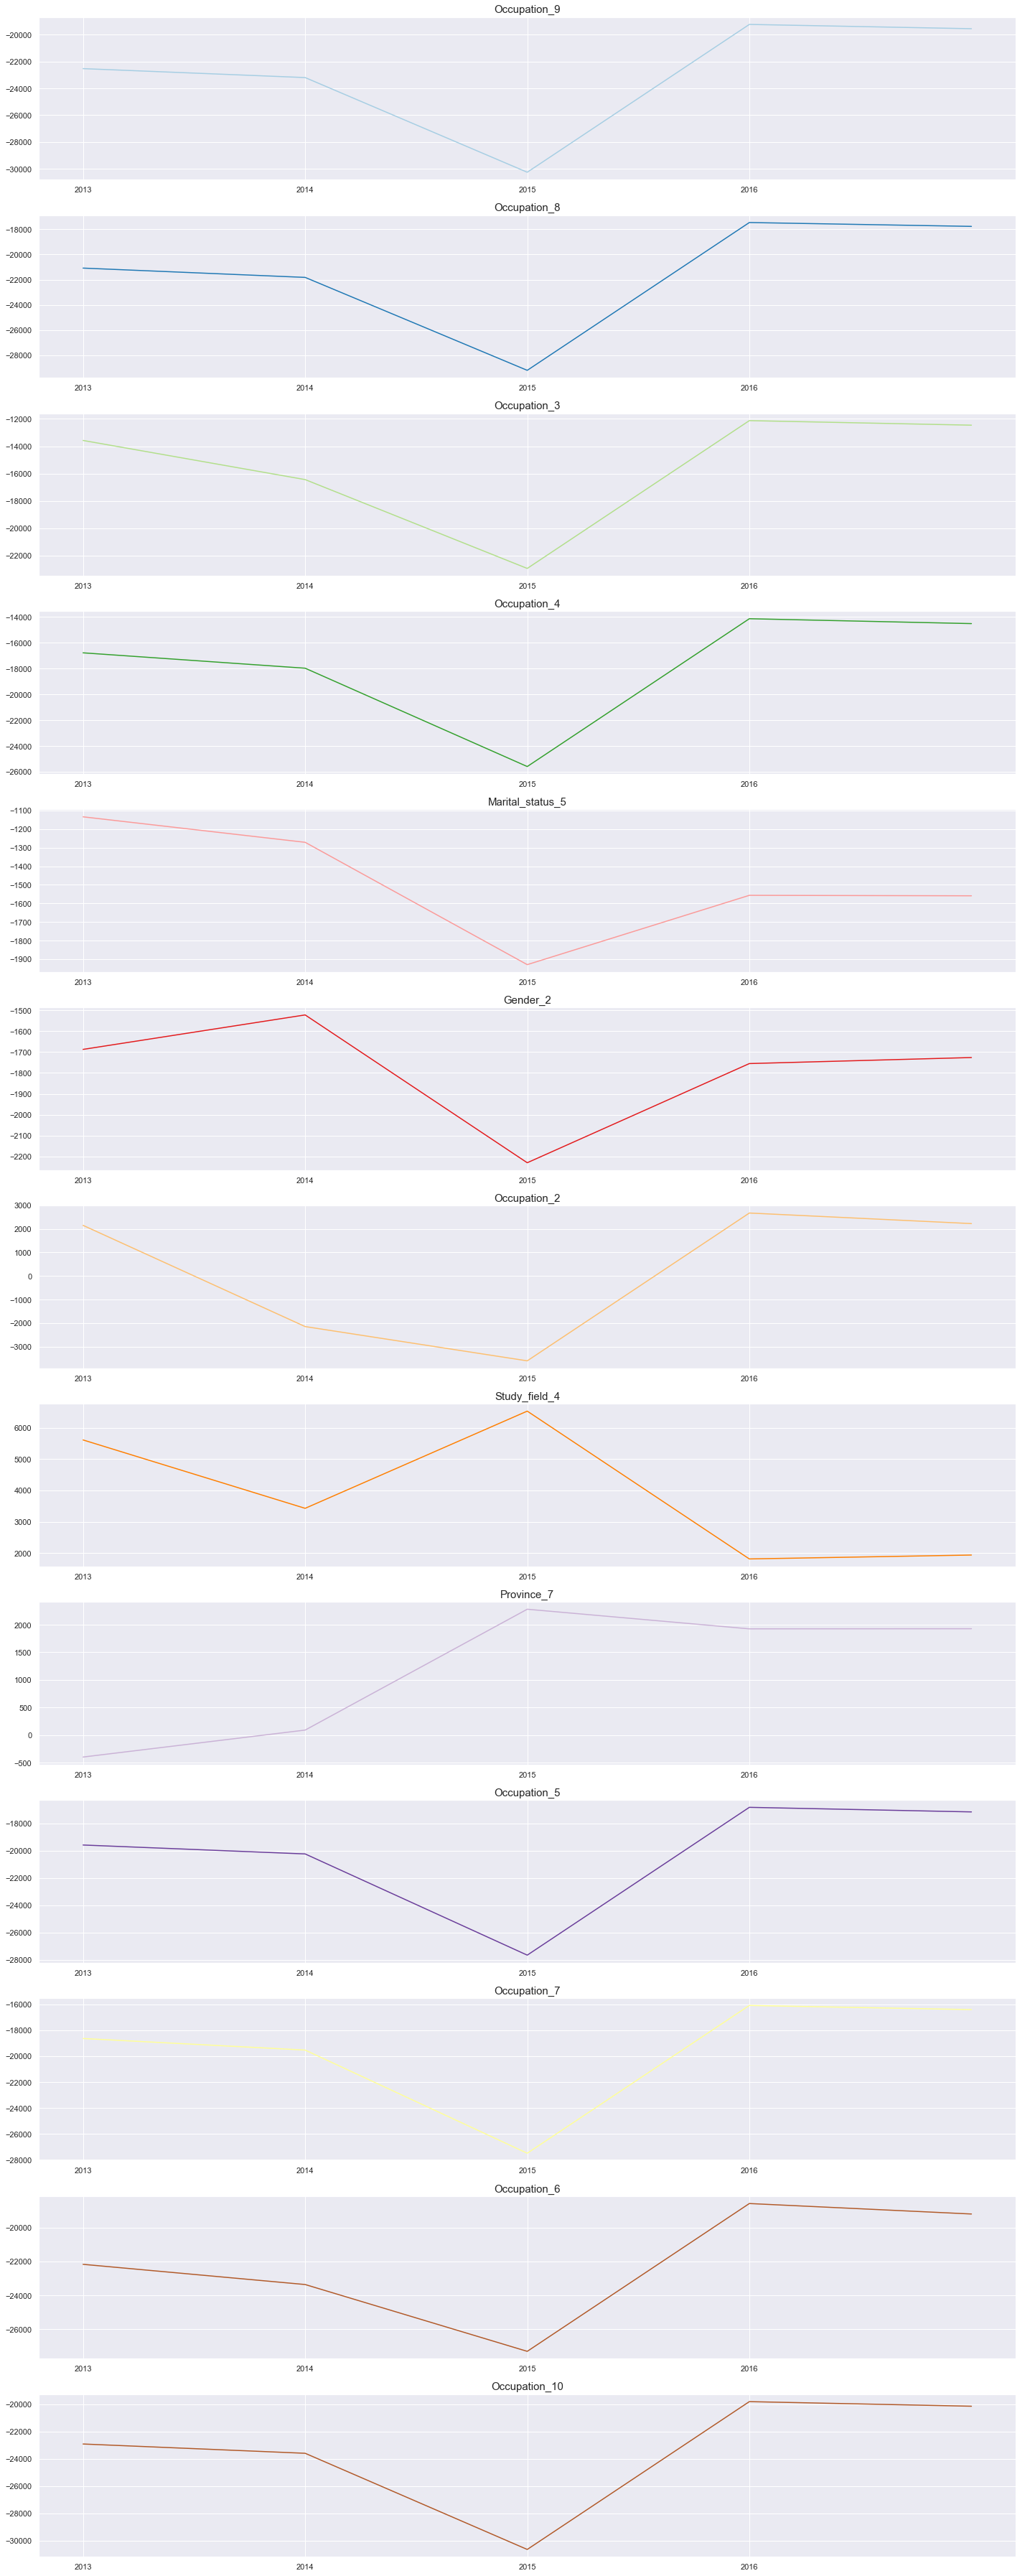

In [699]:
# Plot the values of the coefficents for the most common features over the period of (2013-2017)
sns.set()
ax=plt.figure(figsize=(20,50))
cmap = plt.get_cmap('Paired')
for i in range(0,len(valid_all)):
    plt.subplot(len(valid_all),1,i+1)
    plt.plot(years,temps[i],c=cmap(i))
    plt.xticks(np.arange(2013, 2017, 1)) 
    name=valid_all[i]
    plt.title(name,fontsize=15)
    plt.tight_layout()
plt.show()

As can be seen from the plots above, the regression coefficients of the features do not remain constant over the years, indicating that the relationship of the feature to monthly earnings as well as the other features differ over the years. It is worth noting that over this period, certain features have maintained a exclusively negative/positive relationship with monthly earnings, while the relationship of other features changed the nature of the relationship from negative to positive and vice versa. This indicates that the same features do not have the same relationship or significance to monthly earnings over this period of time. Therefore, the results from one year can not necessarily be generalised to the entire time period.

## Conclusion

#### Answer to research question

The tests above have shown that there is a joint relationship between the education, work and location of a person as well as the gender of the person to the monthly earnings they earn in South Africa. While gender may be related to monthly earnings, gender alone is not enough to infer the monthly earnings of a person, factors such as their level of education and occupation must also be considered.

#### Short comings

The data used in this investigation is not representative of the entire population of South Africa, therefore the results of this project can not necessarily be generalised to the entire population. If a more representative sample of data from the South African workforce is obtained, the results may be more representative of the entire South African population.

#### Future considerations

The purpose of this project was only to identify the existence of relationships between the variables of interest and monthly earnings. However, the project can be extended to describe the possible causal relationships that exist between the variables. This project can be extended to improve the performance of the models fit using the features of interest, with the use of more sophisticated feature selection techniques and regression modelling techniques.